## Setup

In [1]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

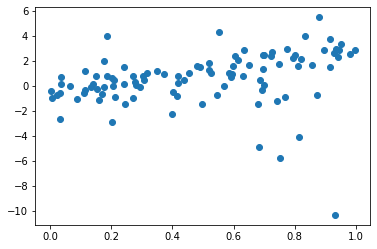

In [2]:
true_weights = 4.0
true_bias = -1.0

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

In [3]:
bias = 0.0

In [20]:
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    y_pred = slope * x + bias
    plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');
    resid = y_true - y_pred
    mse = (resid ** 2).mean()
    mae = resid.abs().mean()
    print(f"MSE: {mse}, MAE: {mae}")

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

- Slope that minimizes MSE: 1.40
- Slope that minimizes MAE: 2.40
- Description of the difference: MSE is more lenient toward outliers and thus has a flatter slope.

### Gradient


In [21]:
# Function to compute mse
def linreg_mse(slope):
    y_pred = slope * x + bias
    resid = y_true - y_pred
    return (resid ** 2).mean()

In [22]:
linreg_mse(2.40)

tensor(4.6011)

In [23]:
linreg_mse(1.40)

tensor(4.2745)

In [26]:
# Function to compute gradient
def compute_gradient(x0):
    eps = 1e-4
    return (linreg_mse(x0 + eps) - linreg_mse(x0)) / eps

compute_gradient(0.0)

tensor(-0.9012)

In [27]:
compute_gradient(1.4)

tensor(0.)

The gradient approaches 0 as x0 approaches the value that minimizes MSE.

### Gradient Descent

Gradient ascent seeks to maximize the gradient, while gradient descent seeks to minimize the gradient.

In [108]:
the_slope = 0
slopes = []
mses = []

# Due to constant step, range limits functionality
for i in range(20):
    eps = 1e-4
    mses.append(linreg_mse(the_slope))
    slopes.append(the_slope)
    grad = (linreg_mse(the_slope + eps) - linreg_mse(the_slope)) / eps
    step = 0.1
    if grad < 0:
        the_slope += step
    elif grad == 0:
        break;
    else:
        the_slope -= step

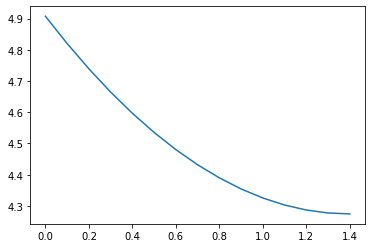

In [109]:
plt.plot(slopes, mses)